In [1]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [2]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-12 20:24:14--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   136MB/s    in 0.7s    

2024-03-12 20:24:15 (136 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    

In [3]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-tcujx_7o
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-tcujx_7o
  Resolved https://github.com/ersilia-os/ersilia.git to commit 311e36ef5228904fc65625270f89b3a469ded42e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 58 kB 4.3 MB/s 
     |████████████████████████████████| 670 kB 17.6 MB/s 
     |████████████████████████████████| 421 kB 60.9 MB/s 
     |████████████████████████████████| 9.9 MB 44.8 MB/s 
     |████████████████████████████████| 139 kB 44.0 MB/s 
     |████████████████████████████████| 4.3 MB 67.2 MB/s 
     |████████████████████████████████| 78 kB 8.6 MB/s 
     |████████████████████████████████| 97 kB 9.4 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 148 kB 62.1 MB/s 
     |████████

In [4]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [5]:
import sys

In [6]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [7]:
## Mount google drive
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
# specifying my input folder

input_folder = "/content/drive/MyDrive/Ersilia"  # @param {type:"string"}

In [10]:
# specifying my output folder

output_folder = "/content/drive/MyDrive/Ersilia"  # @param {type:"string"}

Download and run the selected model from Ersilia and make sure it works

In [11]:
model_name = "eos6oli"

Fetching the model

In [12]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-cn0sgxrv
Solving environment: | failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2023.12.12 |       h06

Serving the model

In [13]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:59773
   PID: 4105
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


Running Predictions for soltranet data found in the github repo

In [14]:
# specify the name of my input csv file

input_filename = "llinas2020_raw"

In [15]:
# specify the SMILES column name
smiles_column = "smiles"

In [16]:
# Extracting SMILES to a list
import pandas as pd

In [17]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 132 SMILES


In [18]:
 #Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 21.54 seconds


In [19]:
# Check the results

print(output.head())

                           key  \
0  BZKPWHYZMXOIDC-UHFFFAOYSA-N   
1  BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
2  ARHWPKZXBHOEEE-UHFFFAOYSA-N   
3  JBDGDEWWOUBZPM-XYPYZODXSA-N   
4  CEUORZQYGODEFX-UHFFFAOYSA-N   

                                               input  solubility  
0                     CC(NC1=NN=C(S1)[S](N)(=O)=O)=O      -1.242  
1                         C(C)(=O)OC1=CC=CC=C1C(=O)O      -1.858  
2                           C=CCOc1ccc(cc1Cl)CC(=O)O      -3.120  
3           O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2      -2.199  
4  O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...      -5.205  


In [20]:
#Save the results in Google Drive


output.to_csv("/content/drive/MyDrive/Ersilia/ErsiliaSoltranet.csv", index=False)

In [21]:

ErsiliaSoltranet=pd.read_csv("/content/drive/MyDrive/Ersilia/ErsiliaSoltranet.csv")
ErsiliaSoltranet.head()

,key,input,solubility
0,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,-1.242
1,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,C(C)(=O)OC1=CC=CC=C1C(=O)O,-1.858
2,ARHWPKZXBHOEEE-UHFFFAOYSA-N,C=CCOc1ccc(cc1Cl)CC(=O)O,-3.120
3,JBDGDEWWOUBZPM-XYPYZODXSA-N,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,-2.199
4,CEUORZQYGODEFX-UHFFFAOYSA-N,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,-5.205


In [30]:
#matching outputs with drug names and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(ErsiliaSoltranet, df[['smiles', 'log S0']], how='left', left_on='input', right_on='smiles')

# Renaming and dropping redundant columns
#merged_predictions = merged_predictions.rename(columns={'log S0': 'true'}).drop(columns='smiles')
merged_predictions = merged_predictions.rename(columns={'log S0': 'true'})
#merged_predictions = merged_predictions.drop(columns='true_values', axis=1)

# Displaying the result
print(merged_predictions)

                             key  \
0    BZKPWHYZMXOIDC-UHFFFAOYSA-N   
1    BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
2    ARHWPKZXBHOEEE-UHFFFAOYSA-N   
3    JBDGDEWWOUBZPM-XYPYZODXSA-N   
4    CEUORZQYGODEFX-UHFFFAOYSA-N   
..                           ...   
127  ZZORFUFYDOWNEF-UHFFFAOYSA-N   
128  NKANXQFJJICGDU-QPLCGJKRSA-N   
129  RMMXLENWKUUMAY-UHFFFAOYSA-N   
130  GUGOEEXESWIERI-UHFFFAOYSA-N   
131  WJCNZQLZVWNLKY-UHFFFAOYSA-N   

                                                 input  solubility  \
0                       CC(NC1=NN=C(S1)[S](N)(=O)=O)=O      -1.242   
1                           C(C)(=O)OC1=CC=CC=C1C(=O)O      -1.858   
2                             C=CCOc1ccc(cc1Cl)CC(=O)O      -3.120   
3             O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2      -2.199   
4    O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...      -5.205   
..                                                 ...         ...   
127      C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC      -3.681   
128  C1

In [31]:
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/merged_Ersiliapredictions.csv", index=False)

In [32]:
def calc_stats(pred_array, true_array, insol_thresh=-6, sol_thresh=-4):
    '''
    This function will calculate the following on the predicted array:
        Hit% = #correct(lower_sol_thresh,upper_sol_thresh) / #(lower_sol_thresh,upper_sol_thresh)
        Fail% = #true(insol_thresh)pred(lower_sol_thresh,upper_sol_thresh) / #pred(lower_sol_thresh,upper_sol_thresh)

    Assumptions: pred_array,true_array are paired numpy arrays.
    '''

    #first we need to access the examples which have true in (lower_sol_thresh, upper_sol_thresh)
    true_mask=(true_array > sol_thresh)

    #calculating the Hit%
    num_true=len(true_array[true_mask])
    poss_hits=pred_array[true_mask]
    num_hits=np.sum((poss_hits>sol_thresh))
    hit=num_hits/float(num_true)

    #calculating the Fail%
    pred_mask=(pred_array > sol_thresh)
    insol_mask=true_array <= insol_thresh
    fail=np.sum(insol_mask & pred_mask) / float(np.sum(pred_mask))

    return hit,fail,np.sum(true_mask),np.sum(pred_mask)

In [35]:
import numpy as np
import pandas as pd
data={}

#adding the SolTranNet data
truths=np.array([])
preds=np.array([])
for s in ['set1','set2']:
    tmp=pd.read_csv('/content/drive/MyDrive/Ersilia/merged_Ersiliapredictions.csv')
    t=tmp['true']
    truths=np.append(truths,t)
    p=tmp['solubility']
    preds=np.append(preds,p)

for ins in [-4,-5,-6]:
    data[ins]={'hit':[],'fail':[]}
    hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
    data[ins]['hit']=[('SolTranNet',hit)]
    data[ins]['fail']=[('SolTranNet',fail)]

In [36]:
np.mean(truths)

-4.321439393939395

19


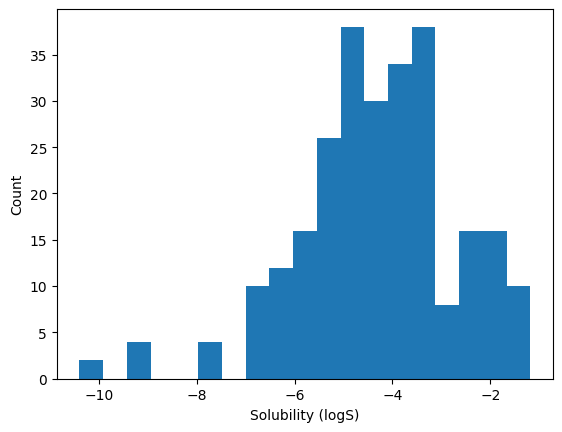

In [37]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
w=0.5
n=math.ceil((max(truths)-min(truths))/w)
print(n)
plt.hist(truths,bins=n)
plt.xlabel('Solubility (logS)')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Ersilia/Reproducibility_plotErsilia.png')

In [38]:
import glob
all_files=glob.glob('/content/drive/MyDrive/Ersilia/SensitivityDatasets/*.csv')
keys=set([x.split('/')[-1].split('_set')[0] for x in all_files])
for ins in [-4,-5,-6]:
    for k in keys:
        truths=np.array([])
        preds=np.array([])
        todo=glob.glob(f'/content/drive/MyDrive/Ersilia/SensitivityDatasets/{k}*.csv')
        for fname in todo:
            tmp=pd.read_csv(fname)
            t=tmp['TRUE']
            truths=np.append(truths,t)
            p=tmp['PREDICTED']
            preds=np.append(preds,p)
        hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
        if np.isnan(hit):
            print(f'{k} hit is nan')
        else:
            data[ins]['hit'].append((k,hit))

        if np.isnan(fail):
            print(f'{k} fail is nan')
        else:
            data[ins]['fail'].append((k,fail))

In [39]:
data

{-4: {'hit': [('SolTranNet', 0.9310344827586207),
   ('umut_a', 0.8793103448275862),
   ('hpsu_b', 0.5517241379310345),
   ('rfsp_b', 0.9482758620689655),
   ('mlkc_a', 0.8620689655172413),
   ('sgurv', 0.7931034482758621),
   ('umut_b', 0.8793103448275862),
   ('xwuc_b', 0.896551724137931),
   ('jcsu_a', 0.8793103448275862),
   ('jmsa_c', 0.9655172413793104),
   ('jmsa_b', 0.8793103448275862),
   ('pmsa_c', 0.7758620689655172),
   ('yumpu_a', 0.7931034482758621),
   ('pmsa_b', 0.7413793103448276),
   ('ytacu', 0.7586206896551724),
   ('jmsa_a', 0.9655172413793104),
   ('jhunc_c', 0.9827586206896551),
   ('hpsu_a', 0.5517241379310345),
   ('jhtny', 0.896551724137931),
   ('jhunc_a', 0.9482758620689655),
   ('rfsp_a', 0.9137931034482759),
   ('jcsu_b', 0.9482758620689655),
   ('pmsa_a', 0.7586206896551724),
   ('ksmit', 0.8620689655172413),
   ('jhunc_b', 1.0),
   ('tdipg', 0.8620689655172413),
   ('umut_c', 0.896551724137931),
   ('mlkc_c', 0.8793103448275862),
   ('xwuc_a', 0.89655172

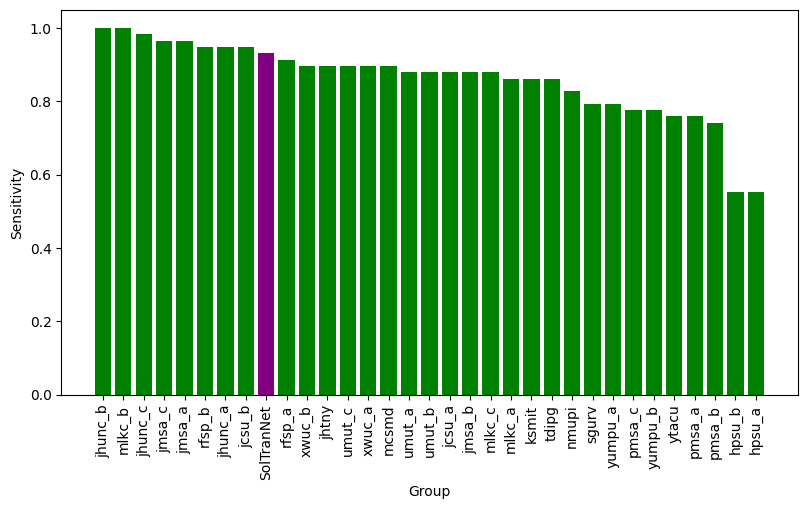

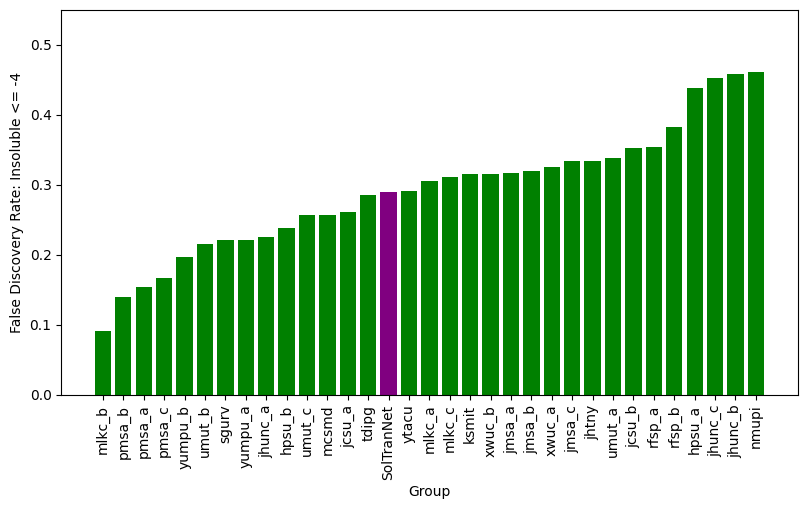

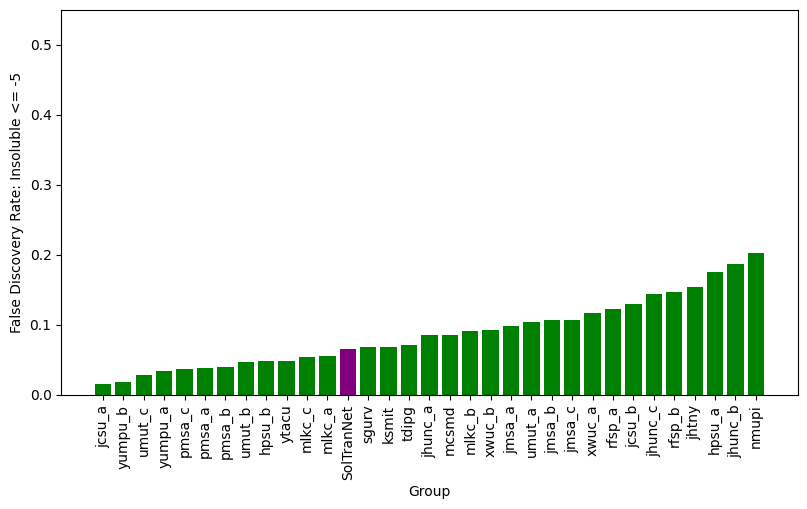

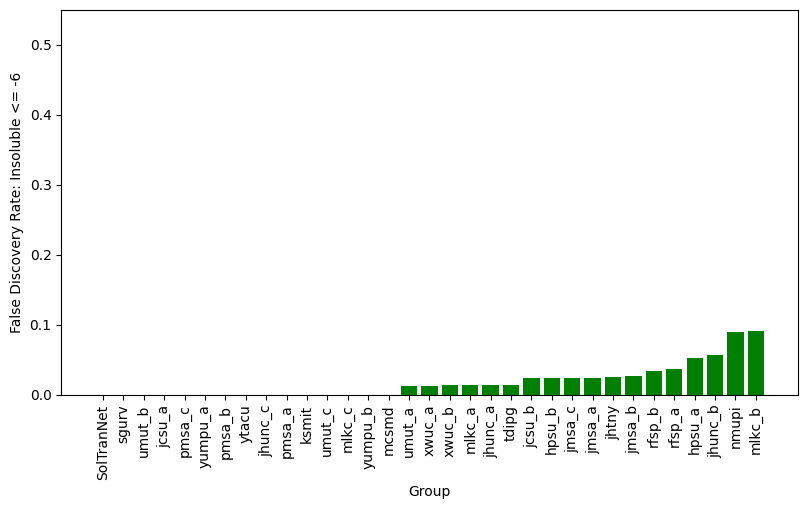

In [40]:
plotted_sens=False
for ins in data:
    for k in data[ins]:
        if k=='hit':
            if plotted_sens:
                continue
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1],reverse=True)
            plt.ylabel('Sensitivity')
        else:
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1])
            plt.ylabel(f'False Discovery Rate: Insoluble <= {ins}')
            plt.ylim((0,0.55))

        labels=[x[0] for x in all_data]
        ys=[x[1] for x in all_data]
        x_pos=[i for i,_ in enumerate(all_data)]
        colors=['purple' if x[0]=='SolTranNet' else 'green' for x in all_data]
        plt.bar(x_pos,ys,color=colors)
        plt.xlabel('Group')
        plt.xticks(x_pos,labels,rotation='vertical')
        filename = f'/content/drive/MyDrive/Ersilia/SensitivityPlot_{ins}Ersilia.png'
        plt.savefig(filename)
        plotted_sens=True